### 6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifer with a small value of C that misclassifes a couple of training observations may perform better on test data than one with a huge value of C that does not misclassify any training observations. You will now investigate this claim.

##### (a) Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.

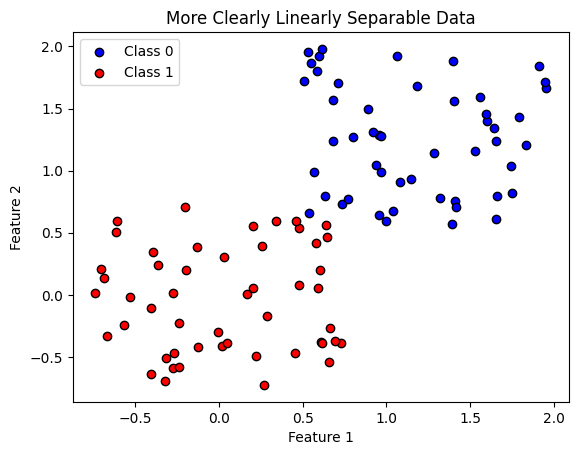

In [12]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)


n_samples = 100

# Generate class 0 data with a larger margin
class0_data = np.random.rand(n_samples // 2, 2) * 1.5 + 0.5

# Generate class 1 data with a larger margin
class1_data = np.random.rand(n_samples // 2, 2) * 1.5 - 0.75

# Combine the data and labels
X = np.concatenate([class0_data, class1_data], axis=0)
y = np.concatenate([np.zeros(n_samples // 2), np.ones(n_samples // 2)])

# Shuffle the data
shuffle_idx = np.random.permutation(n_samples)
X = X[shuffle_idx]
y = y[shuffle_idx]

# Plot the generated data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0', marker='o', edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1', marker='o', edgecolors='k')
plt.title('More Clearly Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


##### (b) Compute the cross-validation error rates for support vector classifers with a range of C values. How many training observations are misclassifed for each value of C considered, and how does this relate to the cross-validation errors obtained?

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = SVC(kernel='linear')
grid = GridSearchCV(model,
                    {'C' : [0.01,0.1,1,2,5,10]},
                    cv=5,
                    scoring='accuracy')
grid.fit(x_train, y_train)
grid.best_estimator_

SVC(C=1, kernel='linear')

C=1 does best in cv lets see best in training error:

In [22]:
C_values = [0.01, 0.1, 1, 2, 5, 10]

train_error = np.zeros(len(C_values))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C).fit(x_train, y_train)
    train_error[i] = model.score(x_train, y_train).round(3)

train_error

array([1.   , 0.987, 1.   , 1.   , 1.   , 1.   ])

C=1 does worst in training error, but does best on cv

##### (c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of C considered. Which value of C leads to the fewest test errors, and how does this compare to the values of C that yield the fewest training errors and the fewest cross-validation errors?

In [23]:
C_values = [0.01, 0.1, 1, 2, 5, 10]

test_error = np.zeros(len(C_values))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C).fit(x_train, y_train)
    test_error[i] = model.score(x_test, y_test).round(3)

test_error

array([0.96, 1.  , 0.96, 0.96, 0.96, 0.96])

##### (d) Discuss your results.
C=1 does best in cv and test error, but does worst in training error